In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [13]:
dataset=pd.read_csv("E:\musk_csv.csv")

In [14]:
dataset.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [15]:
dataset.shape

(6598, 170)

In [17]:
dataset.drop(["ID", "conformation_name"], axis = 1, inplace = True)

In [18]:
dataset.head()

,molecule_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,MUSK-211,46,-108,-60,-69,-117,49,38,-161,-8,...,-308,52,-7,39,126,156,-50,-112,96,1
1,MUSK-211,41,-188,-145,22,-117,-6,57,-171,-39,...,-59,-2,52,103,136,169,-61,-136,79,1
2,MUSK-211,46,-194,-145,28,-117,73,57,-168,-39,...,-134,-154,57,143,142,165,-67,-145,39,1
3,MUSK-211,41,-188,-145,22,-117,-7,57,-170,-39,...,-60,-4,52,104,136,168,-60,-135,80,1
4,MUSK-211,41,-188,-145,22,-117,-7,57,-170,-39,...,-60,-4,52,104,137,168,-60,-135,80,1


In [19]:
dataset.shape

(6598, 168)

In [20]:
X = dataset.iloc[:, 1:170]
y = dataset.select_dtypes(include=[object])

In [21]:
y.head()

,molecule_name
0,MUSK-211
1,MUSK-211
2,MUSK-211
3,MUSK-211
4,MUSK-211


In [22]:
 y.molecule_name.unique()

array(['MUSK-211', 'MUSK-212', 'MUSK-213', 'MUSK-214', 'MUSK-215',
       'MUSK-217', 'MUSK-219', 'MUSK-224', 'MUSK-228', 'MUSK-238',
       'MUSK-240', 'MUSK-256', 'MUSK-273', 'MUSK-284', 'MUSK-287',
       'MUSK-294', 'MUSK-300', 'MUSK-306', 'MUSK-314', 'MUSK-321',
       'MUSK-322', 'MUSK-323', 'MUSK-330', 'MUSK-331', 'MUSK-333',
       'MUSK-344', 'MUSK-f152', 'MUSK-f158', 'MUSK-j33', 'MUSK-j51',
       'MUSK-jf15', 'MUSK-jf17', 'MUSK-jf46', 'MUSK-jf47', 'MUSK-jf58',
       'MUSK-jf59', 'MUSK-jf66', 'MUSK-jf67', 'MUSK-jf78', 'NON-MUSK-192',
       'NON-MUSK-197', 'NON-MUSK-199', 'NON-MUSK-200', 'NON-MUSK-207',
       'NON-MUSK-208', 'NON-MUSK-210', 'NON-MUSK-216', 'NON-MUSK-220',
       'NON-MUSK-226', 'NON-MUSK-232', 'NON-MUSK-233', 'NON-MUSK-244',
       'NON-MUSK-249', 'NON-MUSK-251', 'NON-MUSK-252', 'NON-MUSK-253',
       'NON-MUSK-270', 'NON-MUSK-271', 'NON-MUSK-286', 'NON-MUSK-288',
       'NON-MUSK-289', 'NON-MUSK-290', 'NON-MUSK-295', 'NON-MUSK-296',
       'NON-MUSK-297', 

In [23]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\sahill\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sahill\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\sahill\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """


In [25]:
from sklearn.neural_network import MLPClassifier

In [26]:
mlp=MLPClassifier(hidden_layer_sizes=(10,10,10),max_iter=1000)

In [27]:
mlp.fit(X_train,y_train.values.ravel())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [28]:
predictions = mlp.predict(X_test)

In [34]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))


[[ 3  0  0 ...  0  0  0]
 [ 0  4  0 ...  0  0  0]
 [ 0  0 20 ...  0  0  0]
 ...
 [ 0  0  0 ...  4  0  0]
 [ 0  0  0 ...  0  1  0]
 [ 0  0  0 ...  0  0  8]]
               precision    recall  f1-score   support

     MUSK-211       1.00      1.00      1.00         3
     MUSK-212       1.00      1.00      1.00         4
     MUSK-213       1.00      1.00      1.00        20
     MUSK-214       1.00      1.00      1.00         5
     MUSK-215       1.00      1.00      1.00        14
     MUSK-217       1.00      1.00      1.00        43
     MUSK-219       1.00      1.00      1.00         3
     MUSK-224       1.00      1.00      1.00         1
     MUSK-228       0.80      1.00      0.89         4
     MUSK-238       1.00      1.00      1.00         2
     MUSK-240       1.00      1.00      1.00        17
     MUSK-256       1.00      1.00      1.00         4
     MUSK-273       1.00      1.00      1.00         4
     MUSK-284       1.00      1.00      1.00         4
     MUSK-287     

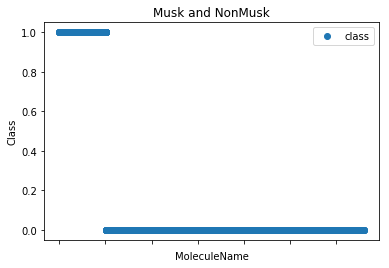

In [53]:
dataset.plot(x='molecule_name',y='class',style='o')
plt.title('Musk and NonMusk')
plt.xlabel('MoleculeName')
plt.ylabel('Class')
plt.show()

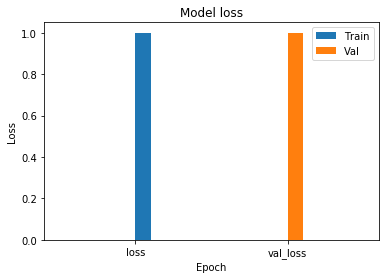

In [59]:
plt.hist(['loss'])
plt.hist(['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

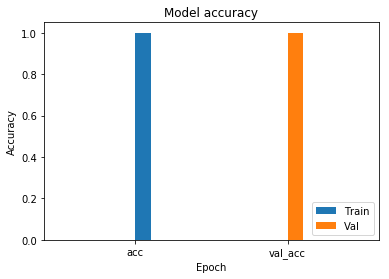

In [60]:
plt.hist(['acc'])
plt.hist(['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()